# Datu pētīšana

Datus pētot un analizējot, mums var būt vairāki mērķi:  
* Potenciālu sakarību meklēšana, lai tās ekstrapolētu, 
* Anomāliju/outlieru atrašana, 
* Konkrētu uzvedību atrašana, lai tās novērstu vai izslēgtu,
* Atbildēšana uz konkrētiem jautājumiem, A/B testi u.t.t.  

Tas nav nekāds pārsteigums, ka viens no spēcīgākajiem datu pētīšanas instrumentiem ir vienkārši paskatīšanās uz tiem. Laba datu vizualizācija var intuitīvi atbildēt uz gandrīz visiem jautājumiem, kuri par kādu datu kopu var rasties jo grafikā mēs vienkārši visu redzam.  

Šajā notebookā ir apkopoti piemēri ar tipiskām datu transformēšanas un attēlošanas pieejām un vairākiem bieži lietotiem vizualizāciju trikiem.  
Lai gan grafiki un vizualizācijas tipiski ir datu apstrādes un  analīzes procesa pēdējais solis, sāksim ar to.

## Y ass transformēšana    
Populārs triks, lai padarītu eksponenciālas vai strauji augošas sakarības vizuāli uztveramākas ir transformēt Y asi.  
Ja mums Y ass vērtības aug aptuveni eksponenciāli (vai ar jebkuras bāzes eksponentfunkciju $Y = a^X$) atkarībā no X ass, Y asi var logaritmēt.  
Apskatīsim, ko mēs sagaidītu un tad paņemsim kādu dabiski eksponenciālu sakarību. Labs piemērs COVID-19 gadījumi ASV atkarībā no laika.

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Izveidosim kādu patvaļīgu eksponenciālu punktu kopu, ko vizualizēt:
X = [i for i in range(0,40)]
Y = [np.e**elem for elem in X]

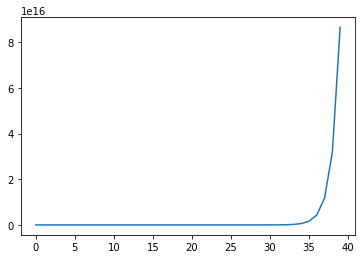

In [3]:
# Šis ir eksponentes grafiks. 
plt.plot(X,Y)

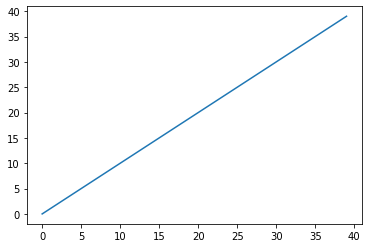

In [4]:
# Logaritmēsim Y un izpētīsim kāds ir rezultāts
Y_log = np.log(Y)
plt.plot(X,Y_log)

In [ ]:
%%bash
curl -O https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv

In [ ]:
%%bash
curl -O https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

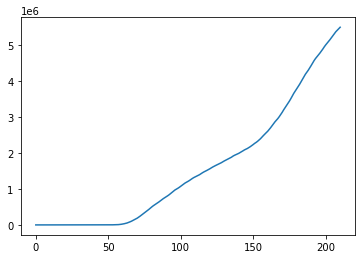

In [6]:
total_data = pd.read_csv('us.csv')
plt.plot(total_data['cases'])

In [7]:
states_data = pd.read_csv('us-states.csv')

Viens no galvenajiem mērķiem cīnoties ar slimībām, kuras strauji izplatās, ir ierobežot šīs izplatīšanās fundamentāli eksponenciālo dabu. Izpētīsim inficēšanās ātrumu vienam no vissmagāk cietušajiem štatiem - NY.

In [9]:
states_data['state'].unique()
ca_pop = 39.51 * 10**6
ny_pop = 19.4 * 10**6
al_pop = 0.735 * 10**6

<ipython-input-10-09b0225b5875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['log_cases'] = np.log(ny['cases'])


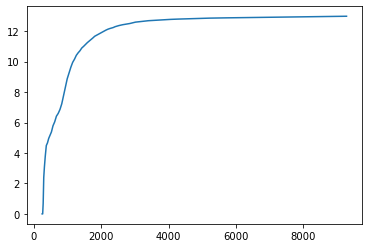

In [10]:
ny = states_data[states_data['state'] == 'New York']
ny['log_cases'] = np.log(ny['cases'])
plt.plot(ny['log_cases'],label='New York')

Šajā grafikā nav ļoti acīmredzams kurā brīdī sākās eksponenciāla izplatība un kurā brīdī ierobežojumi to sāka ierobežot. Pieņemot, ka šī izplatība ir eksponenciāla, varam logaritmēt kolonnu `cases`.

<ipython-input-11-8c2f9403ac9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['log_cases'] = np.log(ny['cases'])
<ipython-input-11-8c2f9403ac9e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al['log_cases'] = np.log(al['cases'])
<ipython-input-11-8c2f9403ac9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

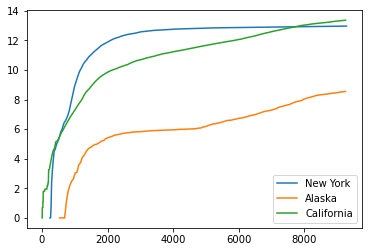

In [11]:
ny = states_data[states_data['state'] == 'New York']
ny['log_cases'] = np.log(ny['cases'])
plt.plot(ny['log_cases'],label='New York')

# Atkārtosim šo pašu darbību ar piem. Aļasku un Kaliforniju
al = states_data[states_data['state']== 'Alaska']
al['log_cases'] = np.log(al['cases'])
plt.plot(al['log_cases'],label='Alaska')

ca = states_data[states_data['state']== 'California']
ca['log_cases'] = np.log(ca['cases'])
plt.plot(ca['log_cases'],label='California')

plt.legend()

In [ ]:
# Salīdzināsim šo ar tīru gadījumu grafiku.
plt.plot(ny['cases'],label='New York')
plt.plot(al['cases'],label='Alaska')
plt.plot(ca['cases'],label='California')
plt.legend()

In [1]:
# Kurš štats ir apturējis vīrusa eksponenciālu izplatību?
# Ko mums vēl vajadzētu ar datiem izdarīt, lai iegūtu objektīvāku skatu?

## Kā vizualizēt? Do's and Dont's.  

Labas vizualizēšanas prakses vairāk veido lietas, kuras nevajadzētu darīt. Apskatīsim piemērus un antipiemērus.  

* Ja mēs attēlojam kādu sakarību, tad uz horizontālās (X ass) vienmēr būtu jābūt tam, kas tiek variēts un uz vertikālās ass (Y ass) šīs variēšanas rezultāts.  
* Asīm ir jābūt nosaukumiem un vērtībām un stabiņu diagrammām būtu jāiekļauj nulle.
* Ja mēs vēlamies variēt vairāk kā vienu parametru, tad uz viena audekla var zīmēt divus dažādus grafikus, bet tiem būtu jābūt atbilstoši apzīmētiem un vizuāli izšķiramiem.  
* Vizualizācija vienmēr jāpielāgo auditorijai t.i. lielā telpā prezentētam grafikam būtu jābūt ar lieliem burtiem un labu kontrastu, kā arī jāattēlo sakarības, kurus mērķauditorija saprot.  
* Vizualizēšana vienmēr ir jādara uz fona, kas netraucē redzamībai.  
* Grafikam būtu jābūt atbilstošām proporcijām un izmēriem t.i. ja gribam pamatot, ka dati ir eksponenciāli, grafika proporcijas un izmēri, kas liek tam izskatīties pēc taisnes ir labākajā gadījumā traucējoši un sliktākajā gadījumā nokomunicē kļūdainu informāciju.  
* Datiem jābūt atbilstoši mērogotiem t.i. to vienu punktu, kurš ir ļoti ļoti tālu no visiem pārējiem var arī neatlikt, ja viņš bojā grafika uzskatāmību.  


## Kā analizēt? Pieiešana datiem zinātniski. Do's and Dont's.  

### Korelācija nenozīmē cēloņsakarību  

Piemēri:
https://www.tylervigen.com/spurious-correlations  

### Ja mēs tiešām vērojam kādu cēloņsakarību, tad var būt gadījumi, kad izdarītās izmaiņas datos parādās kaut kad vēlāk.  

* Ievēlētās Saeimas darbu pie ekonomiskās izaugsmes (piem. izmantojot vidējos ienākumus, IKP un Džini koeficientu kā metrikas) varēs novērtēt tikai sasaukuma beigās vai pāris gadus pēc sasaukuma beigām.

* Reklāmas kampaņu efektivitātes var vērtēt tikai pēc kāda raksturīgā laika perioda piem, kad ir sasniegts kāds skatījumu skaits.

* Finansējuma samazinājumu veselības aprūpei varēs pamanīt hronisku veselības problēmu radīto komplikāciju un mirstības datos sākot no dažiem mēnešiem līdz pat gadiem.  

### Jo lielāks parauga izmērs, jo labāk  

### Jāuzdod pareizi jautājumi  

Pieņemsim, ka vēlamies ļoti aptuveni novērtēt cik labi strādā reklāmas kampaņa un jautājam kādai kopai ar pilsētas centra iedzīvotājiem sekojošo jautājumu:  
"Pēdējā mēneša laikā, cik reizes dienā jūs redzat mūsu uzņēmuma zīmolu?"  

Labāka versija būtu jautāt: 
**"Pēdējā mēneša laikā, cik reizes nedēļā, jūs teiktu, ka redzat mūsu uzņēmuma zīmolu?"**.  
Kāpēc šis jautājums ir labāks? Cilvēki nedos skaitļus ar lielu decimālo precizitāti un tāpēc ņemot dienu skaitus, šiem novērojumiem būs daudz lielāka kļūda, nekā, ja mēs jautāsim vienas nedēļas ietvaros.

### Jāuzdod pareizie jautājumi  

Vai mani dati ir pareizi? Vai mans grafiks datus ir attēlojis pareizi? Vai šim, ko es šobrīd rēķinu ir kāda biznesa vērtība? Ko es ar šo vizualizāciju cenšos pateikt? 

## Kā interpretēt? Pieiešana datiem zinātniski. Do's and Dont's

## Ko grafiks cenšās pateikt?  
Grafiki tipiski atbild uz jautājumiem kā :  

* "Lielums A ir atkarīgs no vai korelē ar lielumu B lūk šādi",  

* "Šīs grupas sadalās šādi",  

* "Šīm grupām atbilst šādas vērtības",  

* "No šīs sakarības, mēs redzam šādas šo sakarību raksturojošās īpašības (maksimumi, minimumi, asimptotas u.t.t.)"  

Jautājumi, ko būtu jāuzdod, pētot grafiku būtu sekojošie:
* Uz kādu jautājumu cenšās atbildēt grafiks uz kuru tu šobrīd skaties?  
* Kā šī sakarība izskatītos, ja mēs to paturpinātu uz priekšu?
* Vai šajos datos ir kādas savādas skaitliskas vērtības?

Pieņemsim, ka mums ir savienoto punktu grafiks, kurā ir attēloti uzņēmuma ieņēmumi pa ceturkšņiem. Katru gadu vasaras ceturtksnis ir visienesīgākais, sastādot aptuveni 45% no gada kopējiem ienākumiem, bet 2020. gadā ienākumi vasaras ceturksnī ir 10% no kopējajiem. Kāpēc?